Cargar Datos


In [2]:
import sqlite3
import pandas as pd
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import seaborn as sns

# Conectar a la base de datos SQLite
conn = sqlite3.connect('Mall_Customer.db')

data = pd.read_sql("SELECT * FROM clientes", conn)






DatabaseError: Execution failed on sql 'SELECT * FROM clientes': no such table: clientes

K-means : Objetivo 1. Agrupar a los clientes en segmentos distintos basados en sus características demográficas y comportamientos de gasto

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


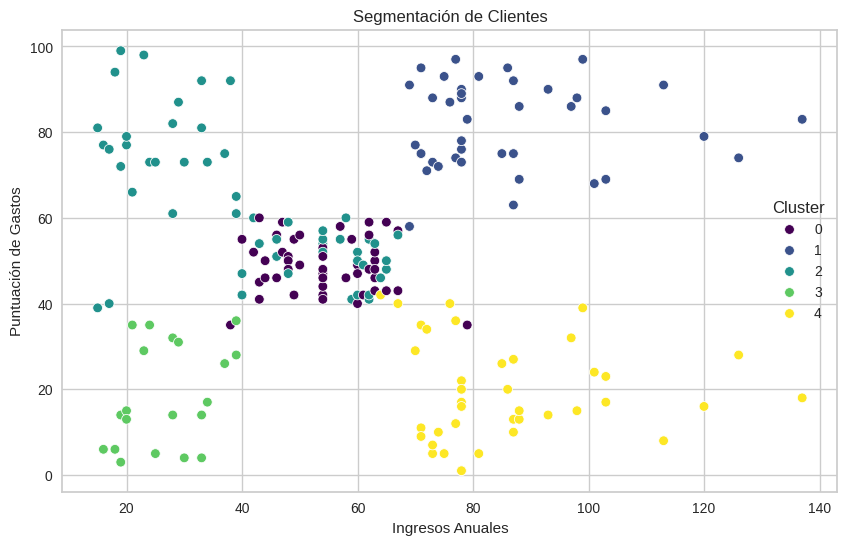

         Count  Mean Age  Mean Annual Income  Mean Spending Score
Cluster                                                          
0           47      56.0                54.0                 49.0
1           40      33.0                86.0                 82.0
2           54      25.0                41.0                 62.0
3           20      46.0                27.0                 18.0
4           39      40.0                86.0                 19.0


In [ ]:
# Seleccionar las características relevantes
features = data[['Age', 'Annual_Income', 'Spending_Score']]

# Normalizar los datos (opcional pero recomendado)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Aplicar K-means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)

# Añadir las etiquetas de los clusters al DataFrame original
data['Cluster'] = kmeans.labels_

# Visualización de los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual_Income', y='Spending_Score', hue='Cluster', palette='viridis')
plt.title('Segmentación de Clientes')
plt.xlabel('Ingresos Anuales')
plt.ylabel('Puntuación de Gastos')
plt.show()


# Crear una tabla resumen con estadísticas descriptivas para cada cluster
cluster_summary = data.groupby('Cluster').agg({
    'CustomerID': 'count',
    'Age': 'mean',
    'Annual_Income': 'mean',
    'Spending_Score': 'mean'
}).rename(columns={
    'CustomerID': 'Count',
    'Age': 'Mean Age',
    'Annual_Income': 'Mean Annual Income',
    'Spending_Score': 'Mean Spending Score'
})

cluster_summary = cluster_summary.round(0)

print(cluster_summary)

•	Objetivo 2. Identificar patrones en el comportamiento de gasto de los clientes según su género, edad e ingreso anual.

<ipython-input-31-6847ca1f7450>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Gender'] = features['Gender'].map({'Male': 0, 'Female': 1})  # Asumiendo 'M' para masculino y 'F' para femenino
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


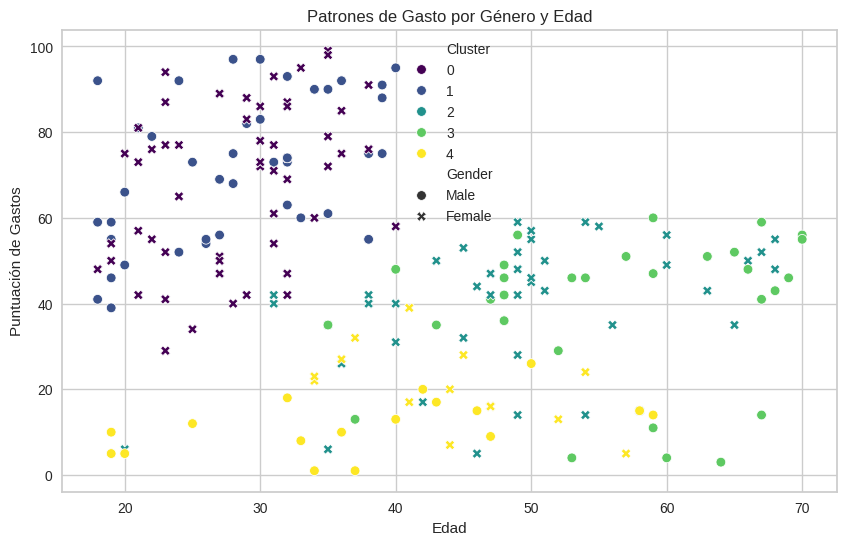

In [ ]:
# Seleccionar las características relevantes incluyendo el género

features = data[['Gender','Age', 'Annual_Income', 'Spending_Score']]

# Convertir la variable categórica 'Genero' a numérica
features['Gender'] = features['Gender'].map({'Male': 0, 'Female': 1})  # Asumiendo 'M' para masculino y 'F' para femenino

# Normalizar los datos
scaled_features = scaler.fit_transform(features)

# Aplicar K-means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)

# Añadir las etiquetas de los clusters al DataFrame original
data['Cluster'] = kmeans.labels_

# Visualización de los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Spending_Score', hue='Cluster', style='Gender', palette='viridis')
plt.title('Patrones de Gasto por Género y Edad')
plt.xlabel('Edad')
plt.ylabel('Puntuación de Gastos')
plt.show()


Objetivo 3. Analizar la distribución demográfica de los clientes y cómo afecta su comportamiento de gasto.

<ipython-input-52-d83321df1c3d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Gender'] = features['Gender'].map({'Male': 0, 'Female': 1})
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   Cluster                                     Gender        Age  \
0        0                                        1.0  28.345455   
1        1                                        1.0  28.250000   
2        2                                        1.0  48.720930   
3        3                                        1.0  55.903226   
4        4  [0.5483870967741935, 0.45161290322580644]  40.419355   

   Annual_Income  Spending_Score  
0      60.800000       68.654545  
1      62.000000       71.675000  
2      46.186047       39.674419  
3      48.774194       38.806452  
4      90.000000       15.741935  


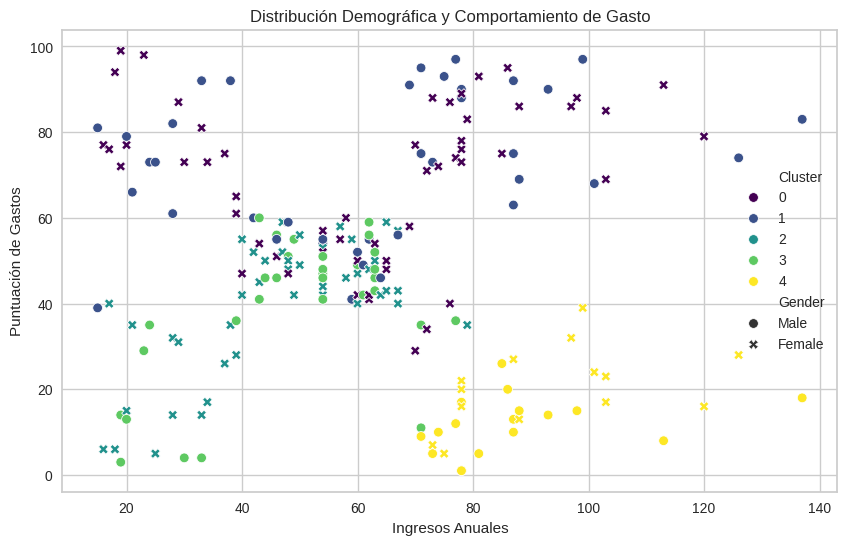

In [ ]:
# Seleccionar las características relevantes incluyendo el género

features = data[['Gender', 'Age', 'Annual_Income', 'Spending_Score']]

# Convertir la variable categórica 'Genero' a numérica
features['Gender'] = features['Gender'].map({'Male': 0, 'Female': 1})

# Normalizar los datos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Aplicar K-means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)


# Añadir las etiquetas de los clusters al DataFrame original
data['Cluster'] = kmeans.labels_

# Analizar la distribución demográfica y el comportamiento de gasto

demographic_analysis = data.groupby('Cluster').agg({
    'Gender': lambda x: x.value_counts(normalize=True),
    'Age': 'mean',
    'Annual_Income': 'mean',
    'Spending_Score': 'mean',
}).reset_index()

print(demographic_analysis)

# Visualización de los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual_Income', y='Spending_Score', hue='Cluster', style='Gender', palette='viridis')
plt.title('Distribución Demográfica y Comportamiento de Gasto')
plt.xlabel('Ingresos Anuales')
plt.ylabel('Puntuación de Gastos')
plt.show()

